<a href="https://colab.research.google.com/github/jhportfolio1/MsAiSchool_03_Ai_Data/blob/main/AI07_Scikit_Learn_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Regression - Linear Regression

>## 1) Linear Regression 
- 선형 회귀 중 종속 변수와 한 개 이상의 독립 변수와의 선형 관계를 모델링 함

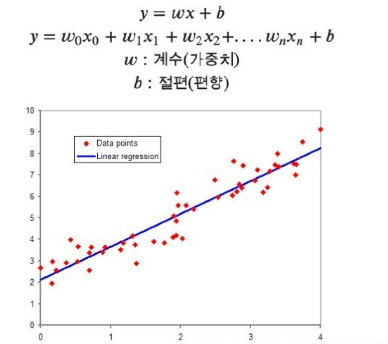

>## 2) 적용

>>### (1) 비만 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

>>### (2) 데이터 라벨링 및 모형 확인

In [ ]:
data = diabetes.data
label = diabetes.target
columns = diabetes.feature_names

In [ ]:
data = pd.DataFrame(data, columns = columns)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


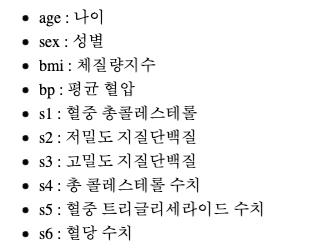

In [ ]:
data.shape

(442, 10)

>>### (3) Simple Linear Regression (1개의 수치만 적용)

- 알고리즘 가져오기

In [ ]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

- 데이터 쪼개기

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,label,test_size=0.2, random_state=2023)

- 혈당 수치만 가져오기 - Numpy 형식으로 가져와야 알아들음

In [ ]:
X_train['s6'].values.reshape((-1, 1))

array([[-0.04664087],
       [ 0.03205916],
       [ 0.03620126],
       [-0.02593034],
       [-0.01764613],
       [ 0.02791705],
       [ 0.00720652],
       [ 0.01963284],
       [-0.0010777 ],
       [ 0.06933812],
       [-0.03835666],
       [-0.01350402],
       [-0.01350402],
       [ 0.01549073],
       [ 0.04448548],
       [-0.03421455],
       [ 0.07348023],
       [ 0.04034337],
       [ 0.02791705],
       [ 0.04448548],
       [ 0.02377494],
       [-0.03835666],
       [-0.00936191],
       [-0.0052198 ],
       [ 0.00720652],
       [ 0.02791705],
       [ 0.04034337],
       [-0.05906719],
       [ 0.02791705],
       [ 0.09833287],
       [ 0.07348023],
       [ 0.02791705],
       [-0.0052198 ],
       [-0.03421455],
       [ 0.0569118 ],
       [-0.04249877],
       [-0.00936191],
       [-0.03835666],
       [ 0.06519601],
       [-0.0010777 ],
       [-0.01764613],
       [-0.03835666],
       [ 0.00720652],
       [-0.03835666],
       [-0.03835666],
       [-0

- 데이터 학습

In [ ]:
sim_lr.fit(X_train['s6'].values.reshape((-1,1)),y_train)

LinearRegression()

- 데이터 예측

In [ ]:
y_pred = sim_lr.predict(X_test['s6'].values.reshape((-1,1)))

- 결과보기

In [ ]:
from sklearn.metrics import r2_score
print('단순 선형 회귀, R2 : {:.2f}'.format(r2_score(y_test,y_pred)))
print('단순 선형 회귀 계수(w2): {:.2f}, 절편(b): {:.2f}'.format(sim_lr.coef_[0], sim_lr.intercept_))

단순 선형 회귀, R2 : 0.16
단순 선형 회귀 계수(w2): 586.70, 절편(b): 152.60


- 결과의 시각화(Linear Regression 생성)

In [ ]:
line_x = np.linspace(np.min(X_test['s6']), max(X_test['s6']), 10)    #최대값, 최소값, 점의개수
line_y = sim_lr.predict(line_x.reshape((-1,1)))

print(line_x)
print(line_y)

[-0.12948301 -0.10002803 -0.07057305 -0.04111806 -0.01166308  0.0177919
  0.04724688  0.07670187  0.10615685  0.13561183]
[ 76.63014404  93.91143293 111.19272182 128.4740107  145.75529959
 163.03658848 180.31787736 197.59916625 214.88045514 232.16174402]


- test 데이터 표현

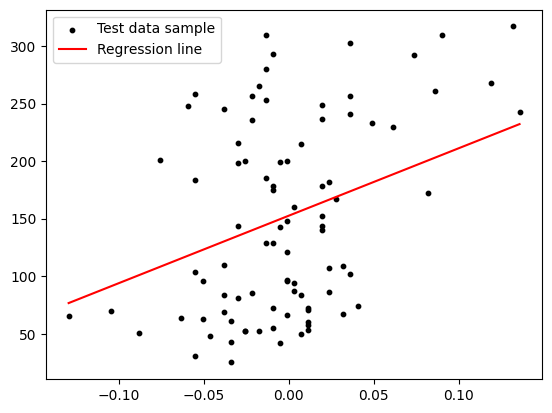

In [ ]:
plt.scatter(X_test['s6'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Test data sample','Regression line',])

>>### (4) Multiple Linear Regression (여러개 수치 적용)

- 데이터 적용하기

In [ ]:
mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train)
y_pred = mul_lr.predict(X_test)

- 결과 확인 (R2= 정확도)

In [ ]:
print('다중 선형 회귀, R2: {:.2f}'.format(r2_score(y_test, y_pred)))

다중 선형 회귀, R2: 0.50


# 2. Regression - ML algorithm Based Regression

>## 1) 결정트리 (Decision Tree Regression)
- 결정트리모델(Decision Tree)은 데이터의 불순도를 최소화 하는 방향으로 트리를 분기하여 모델 생성

>>### (1) 적용 - 결정트리 단순모델

- 알고리즘 가져오기

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=5) 

- 데이터 적용

In [ ]:
dt_regr.fit(X_train['s6'].values.reshape((-1,1)),y_train)

DecisionTreeRegressor(max_depth=5)

- 데이터 예측

In [ ]:
y_pred = dt_regr.predict(X_test['s6'].values.reshape((-1,1)))

In [ ]:
print('단순 결정 트리 회귀 R2 : {:.2f}'.format(r2_score(y_test, y_pred)))

단순 결정 트리 회귀 R2 : 0.14


- 데이터 시각화

[-0.12948301 -0.10002803 -0.07057305 -0.04111806 -0.01166308  0.0177919
  0.04724688  0.07670187  0.10615685  0.13561183]
[118.41176471 118.41176471 118.41176471 125.75       118.63636364
 150.42857143 197.57692308 202.66666667 202.66666667 263.        ]


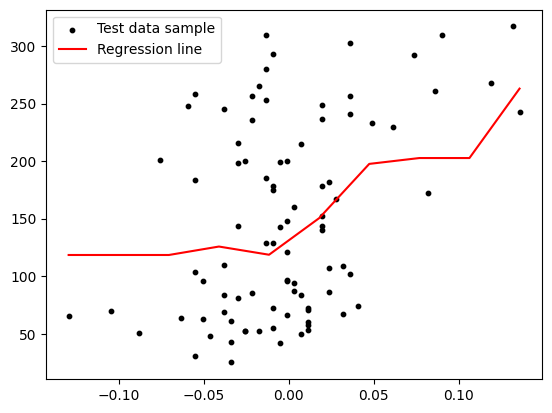

In [ ]:
line_x = np.linspace(np.min(X_test['s6']), max(X_test['s6']), 10)    #최대값, 최소값, 점의개수
line_y = dt_regr.predict(line_x.reshape((-1,1)))

print(line_x)
print(line_y)

plt.scatter(X_test['s6'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Test data sample','Regression line',])

In [ ]:
mt_regre = DecisionTreeRegressor(max_depth=3)
mt_regre.fit(X_train, y_train)
y_pred = mt_regre.predict(X_test)
print('다중 결정 회귀, r2 : {:.2f}'.format(r2_score(y_test, y_pred)))

다중 결정 회귀, r2 : 0.35


>## 2) Support Vector Machine Regression

- 알고리즘 가져오기

In [ ]:
from sklearn.svm import SVR
svm_regre = SVR()

- 데이터 적용

In [ ]:
svm_regre.fit(X_train['s6'].values.reshape((-1,1)), y_train)

SVR()

- 데이터 예측

In [ ]:
y_pred = svm_regre.predict(X_test['s6'].values.reshape((-1,1)))
print('단순 서포트 벡터 머신 회귀, R2: {:.2f}'.format(r2_score(y_test, y_pred)))

단순 서포트 벡터 머신 회귀, R2: 0.06


- 다중 서포트 벡터 머신 회귀

In [ ]:
svm_regr = SVR()
svm_regr.fit(X_train, y_train)
y_pred = svm_regr.predict(X_test)
print('다중 서포트 벡터 머신 회귀, R2: {:.2f}'.format(r2_score(y_test, y_pred)))

다중 서포트 벡터 머신 회귀, R2: 0.17


- 다중 서포트 벡터 머신 회귀 for문으로 최적값 찾기

In [ ]:
for i in [1,2,3,4,54,6,7,3,2,1,2,3,4,2,1,34,5,6]:
  svm_regr = SVR()
  svm_regr.fit(X_train, y_train)
  y_pred = svm_regr.predict(X_test)
  print('다중 서포트 벡터 머신 회귀, i={} R2: {:.2f}'.format(i, r2_score(y_test, y_pred)))

다중 서포트 벡터 머신 회귀, i=1 R2: 0.17
다중 서포트 벡터 머신 회귀, i=2 R2: 0.17
다중 서포트 벡터 머신 회귀, i=3 R2: 0.17
다중 서포트 벡터 머신 회귀, i=4 R2: 0.17
다중 서포트 벡터 머신 회귀, i=54 R2: 0.17
다중 서포트 벡터 머신 회귀, i=6 R2: 0.17
다중 서포트 벡터 머신 회귀, i=7 R2: 0.17
다중 서포트 벡터 머신 회귀, i=3 R2: 0.17
다중 서포트 벡터 머신 회귀, i=2 R2: 0.17
다중 서포트 벡터 머신 회귀, i=1 R2: 0.17
다중 서포트 벡터 머신 회귀, i=2 R2: 0.17
다중 서포트 벡터 머신 회귀, i=3 R2: 0.17
다중 서포트 벡터 머신 회귀, i=4 R2: 0.17
다중 서포트 벡터 머신 회귀, i=2 R2: 0.17
다중 서포트 벡터 머신 회귀, i=1 R2: 0.17
다중 서포트 벡터 머신 회귀, i=34 R2: 0.17
다중 서포트 벡터 머신 회귀, i=5 R2: 0.17
다중 서포트 벡터 머신 회귀, i=6 R2: 0.17


>## 3) Multi Layer Perception Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(hidden_layer_sizes=200, max_iter=400)
mlp_regr.fit(X_train, y_train)
y_pred = mlp_regr.predict(X_test)

print('다중 MLP 회귀 RW : {:.2f}'.format(r2_score(y_test, y_pred)))

다중 MLP 회귀 RW : -0.06


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
